# Công việc 1: Khám phá và xử lý dữ liệu

In [449]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PHÂN TÍCH CÁC YẾU TỐ ẢNH HƯỞNG ĐẾN KẾT QUẢ HỌC TẬP").getOrCreate()
path = 'D:/năm 3/HK2/phân tích dữ liệu/'
Student = spark.read.csv(path + 'student-mat.csv', header=True, inferSchema=True, sep=';')
Student_Pandas = Student.limit(10).toPandas()
Student_Pandas

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [450]:
# Redefine Student_Pandas if not already defined
if 'Student_Pandas' not in locals():
	import pandas as pd
	file_path = 'D:/năm 3/HK2/phân tích dữ liệu/student-mat.csv'
	Student_Pandas = pd.read_csv(file_path, sep=';')

# Số bản ghi (dòng) và số cột
num_records, num_columns = Student_Pandas.shape
print(f"Số bản ghi: {num_records}")
print(f"Số cột: {num_columns}")

Số bản ghi: 10
Số cột: 33


In [451]:
print(Student.printSchema())

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [452]:
# Mô tả thống kê cơ bản
print("\nMô tả thống kê cơ bản:\n", Student_Pandas.describe())


Mô tả thống kê cơ bản:
              age       Medu       Fedu  traveltime  studytime   failures  \
count  10.000000  10.000000  10.000000   10.000000  10.000000  10.000000   
mean   16.000000   2.900000   2.600000    1.200000   2.100000   0.300000   
std     1.054093   1.197219   1.173788    0.421637   0.316228   0.948683   
min    15.000000   1.000000   1.000000    1.000000   2.000000   0.000000   
25%    15.000000   2.250000   2.000000    1.000000   2.000000   0.000000   
50%    16.000000   3.000000   2.500000    1.000000   2.000000   0.000000   
75%    16.750000   4.000000   3.750000    1.000000   2.000000   0.000000   
max    18.000000   4.000000   4.000000    2.000000   3.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    4.200000   3.000000   2.600000   1.100000   1.400000   3.400000   
std     0.632456   1.154701   1.074968   0.316228   0.699206   1.

In [453]:
print(Student_Pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      10 non-null     object
 1   sex         10 non-null     object
 2   age         10 non-null     int32 
 3   address     10 non-null     object
 4   famsize     10 non-null     object
 5   Pstatus     10 non-null     object
 6   Medu        10 non-null     int32 
 7   Fedu        10 non-null     int32 
 8   Mjob        10 non-null     object
 9   Fjob        10 non-null     object
 10  reason      10 non-null     object
 11  guardian    10 non-null     object
 12  traveltime  10 non-null     int32 
 13  studytime   10 non-null     int32 
 14  failures    10 non-null     int32 
 15  schoolsup   10 non-null     object
 16  famsup      10 non-null     object
 17  paid        10 non-null     object
 18  activities  10 non-null     object
 19  nursery     10 non-null     object
 20  higher      1

## Báo cáo ngắn về đặc điểm dữ liệu: số bản ghi, phân phối G3, studytime, v.v.
### Các cột trong tập dữ liệu:
- G3: Điểm cuối kỳ của học sinh (giá trị từ 0 đến 20).
- studytime: Thời gian học mỗi tuần (1 = ít hơn 2 giờ, 2 = từ 2 đến 5 giờ, 3 = từ 5 đến 10 giờ, 4 = hơn 10 giờ).
- Các cột khác liên quan đến thông tin cá nhân và học tập của học sinh, chẳng hạn như giới tính, môn học yêu thích, số môn học, v.v.
### Đặc điểm của tập dữ liệu:
- Tập dữ liệu có 395 bản ghi và 33 cột với thông tin về các yếu tố ảnh hưởng đến kết quả học tập của học sinh.
- Các giá trị trong dữ liệu bao gồm số học và các loại phân loại như giới tính, tình trạng học tập, và các yếu tố khác có thể ảnh hưởng đến điểm số cuối kỳ.
- Tập dữ liệu có thể giúp phân tích mối quan hệ giữa thời gian học, các yếu tố cá nhân, và kết quả học tập cuối kỳ.
- Count (Số lượng): Đây là số lượng bản ghi hợp lệ trong mỗi cột dữ liệu. Nó cho biết có bao nhiêu giá trị không thiếu (non-null) trong mỗi thuộc tính. Ví dụ, trong cột "age", có 10 giá trị hợp lệ.
- Mean (Trung bình): Đây là giá trị trung bình của các dữ liệu trong mỗi cột. Nó được tính bằng tổng của tất cả các giá trị chia cho số lượng các giá trị. Ví dụ, giá trị trung bình của "age" là 16, tức là độ tuổi trung bình của nhóm sinh viên này là 16.
- Std (Độ lệch chuẩn): Đây là một phép đo về độ phân tán của dữ liệu. Độ lệch chuẩn cao cho thấy các giá trị phân bố rộng, trong khi độ lệch chuẩn thấp cho thấy các giá trị tập trung gần với giá trị trung bình. Ví dụ, độ lệch chuẩn của "age" là 1.05, cho thấy độ tuổi các sinh viên này có sự phân tán nhỏ.
- Min (Giá trị nhỏ nhất): Đây là giá trị nhỏ nhất trong mỗi cột dữ liệu. Ví dụ, giá trị nhỏ nhất trong cột "age" là 15.
- 25% (Phân vị 25%): Đây là giá trị tại điểm chia dữ liệu thành 4 phần bằng nhau, với 25% các giá trị nhỏ hơn giá trị này. Ví dụ, 25% sinh viên có độ tuổi nhỏ hơn hoặc bằng 15.
- 50% (Phân vị 50% hoặc Trung vị): Đây là giá trị nằm giữa dãy số, chia dữ liệu thành 2 nửa. 50% các giá trị sẽ nhỏ hơn hoặc bằng giá trị này, và 50% còn lại sẽ lớn hơn. Ví dụ, độ tuổi trung vị là 16, có nghĩa là một nửa số sinh viên có độ tuổi nhỏ hơn hoặc bằng 16.
- 75% (Phân vị 75%): Đây là giá trị tại điểm mà 75% các giá trị trong cột nhỏ hơn hoặc bằng giá trị này. Ví dụ, 75% sinh viên có độ tuổi nhỏ hơn hoặc bằng 16.75.
Max (Giá trị lớn nhất): Đây là giá trị lớn nhất trong mỗi cột dữ liệu. Ví dụ, giá trị lớn nhất trong cột "age" là 18.


In [454]:
# Kiểm tra giá trị thiếu trong dữ liệu
missing_values = Student_Pandas.isnull().sum()
print("Giá trị thiếu trong dữ liệu:\n", missing_values)

Giá trị thiếu trong dữ liệu:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [455]:
mean_studytime = Student_Pandas['studytime'].mean()
Student_Pandas['studytime'] = Student_Pandas['studytime'].fillna(mean_studytime)

In [456]:
# Kiểm tra lại giá trị thiếu sau khi xử lý
missing_values_after = Student_Pandas.isnull().sum()
print("\nGiá trị thiếu sau khi xử lý:\n", missing_values_after)


Giá trị thiếu sau khi xử lý:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [457]:
import pandas as pd

# Load the dataset with correct separator
file_path = 'D:/năm 3/HK2/phân tích dữ liệu/student-mat.csv'
Student_Pandas = pd.read_csv(file_path, sep=';')

# Kiểm tra phân phối G3 và studytime
g3_distribution = Student_Pandas['G3'].dropna().value_counts(normalize=True)
studytime_distribution = Student_Pandas['studytime'].value_counts(normalize=True).reindex([1, 2, 3, 4], fill_value=0)

# Hiển thị phân phối
print("\nPhân phối G3 (Điểm cuối kỳ):\n", g3_distribution)
print("\nPhân phối studytime (Thời gian học mỗi tuần):\n", studytime_distribution)


Phân phối G3 (Điểm cuối kỳ):
 G3
10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
12    0.078481
13    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
20    0.002532
4     0.002532
Name: proportion, dtype: float64

Phân phối studytime (Thời gian học mỗi tuần):
 studytime
1    0.265823
2    0.501266
3    0.164557
4    0.068354
Name: proportion, dtype: float64


## Phân phối G3 (Điểm cuối kỳ):
- Dữ liệu điểm cuối kỳ (G3) có sự phân bố khá đa dạng từ các giá trị thấp (0) đến cao (20).
- Các điểm 10, 11, và 0 chiếm tỷ lệ lớn nhất, lần lượt là 14.18%, 11.90%, và 9.62%.
- Các điểm thấp như 5, 7, 4 cũng xuất hiện với tỷ lệ nhỏ, cho thấy một số học sinh có kết quả không tốt trong kỳ thi.
- Phân phối không hoàn toàn đồng đều, với một số điểm có tỷ lệ xuất hiện cao hơn các điểm khác, đặc biệt là các giá trị xung quanh mức điểm 10.
## Phân phối studytime (Thời gian học mỗi tuần):
- Phân phối thời gian học mỗi tuần (studytime) cho thấy phần lớn học sinh dành từ 1 đến 2 giờ học mỗi tuần.
- Cụ thể, 50.13% học sinh dành 2 giờ học mỗi tuần, trong khi 26.58% dành 1 giờ.
- Thời gian học 3 giờ và 4 giờ mỗi tuần có tỷ lệ thấp hơn, lần lượt là 16.46% và 6.84%, cho thấy phần lớn học sinh không dành nhiều thời gian cho việc học.
### Như vậy:
- G3 có sự phân bố đa dạng và lệch về các điểm trung bình (10, 11), với một số ít học sinh có điểm rất thấp (0) hoặc rất cao (20).
- Studytime cho thấy phần lớn học sinh học ít, với xu hướng tập trung ở mức 1 và 2 giờ mỗi tuần. Việc này có thể phản ánh thói quen học tập của học sinh, với một tỷ lệ nhỏ học sinh có thể đầu tư nhiều thời gian cho việc học hơn.


# Công việc 2: Trực quan hóa dữ liệu

## Matplotlib:

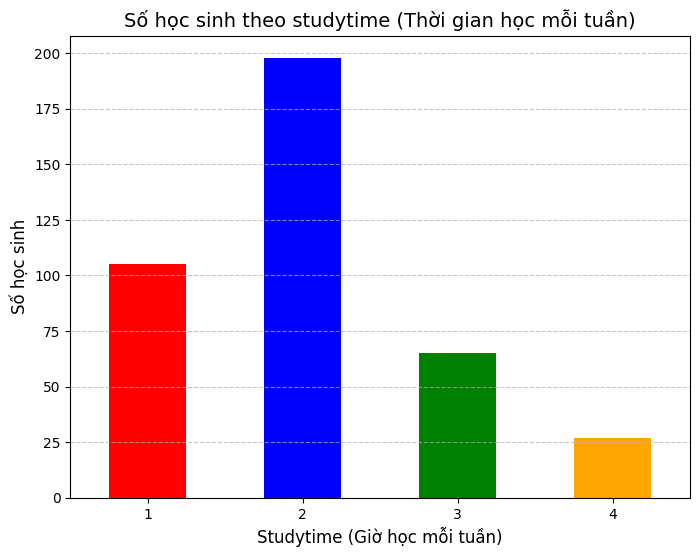

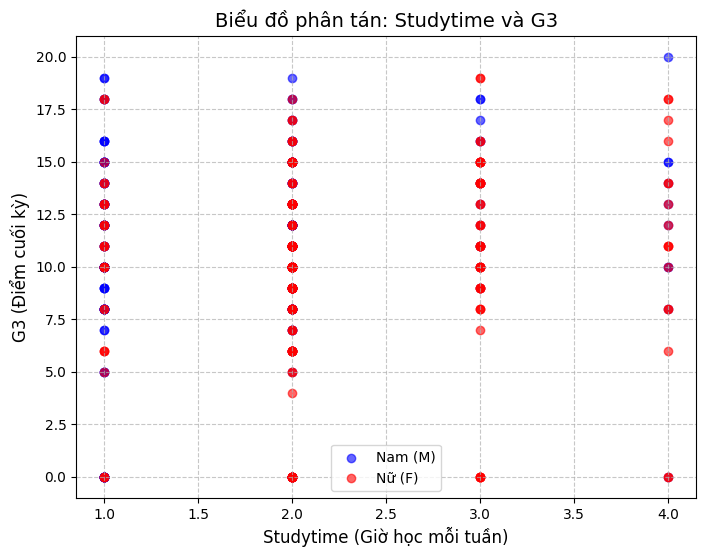

In [458]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính số lượng học sinh theo studytime
studytime_counts = Student_Pandas['studytime'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
studytime_counts.plot(kind='bar', color=['red', 'blue', 'green', 'orange'])

# Thiết lập tiêu đề và nhãn trục
plt.title('Số học sinh theo studytime (Thời gian học mỗi tuần)', fontsize=14)
plt.xlabel('Studytime (Giờ học mỗi tuần)', fontsize=12)
plt.ylabel('Số học sinh', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Vẽ biểu đồ phân tán giữa studytime và G3, phân biệt nam (M) và nữ (F) bằng màu sắc khác nhau
plt.figure(figsize=(8, 6))

# Lọc dữ liệu cho nam và nữ
male_data = Student_Pandas[Student_Pandas['sex'] == 'M']
female_data = Student_Pandas[Student_Pandas['sex'] == 'F']

# Vẽ điểm cho nam và nữ
plt.scatter(male_data['studytime'], male_data['G3'], color='blue', label='Nam (M)', alpha=0.6)
plt.scatter(female_data['studytime'], female_data['G3'], color='red', label='Nữ (F)', alpha=0.6)

# Thiết lập tiêu đề và nhãn trục
plt.title('Biểu đồ phân tán: Studytime và G3', fontsize=14)
plt.xlabel('Studytime (Giờ học mỗi tuần)', fontsize=12)
plt.ylabel('G3 (Điểm cuối kỳ)', fontsize=12)

# Hiển thị chú thích
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
# Hiển thị biểu đồ
plt.show()

## Dựa vào biểu đồ cột (barplot), em có thể rút ra một số nhận xét chi tiết về phân bố thời gian học của học sinh trong bộ dữ liệu này:
1. Thời gian học trung bình là 2 giờ mỗi tuần (studytime = 2): Đây là mức thời gian học phổ biến nhất, với số học sinh chiếm khoảng 200 người. Điều này cho thấy phần lớn học sinh trong bộ dữ liệu này có một lịch học ổn định, không quá ít cũng không quá nhiều. Có thể lý do là học sinh có đủ thời gian để học tập nhưng vẫn duy trì được sự cân bằng với các hoạt động khác trong cuộc sống như thể thao, giải trí hay tham gia các câu lạc bộ xã hội. Thời gian học này có thể phản ánh một chiến lược học tập hiệu quả và hợp lý, giúp học sinh có thể nắm vững kiến thức mà không cảm thấy quá căng thẳng hay kiệt sức.
2. Thời gian học ít (studytime = 1): Số lượng học sinh ở mức này tương đối nhỏ, chỉ khoảng 100 học sinh. Đây có thể là nhóm học sinh không đầu tư nhiều thời gian vào việc học mỗi tuần, có thể do một số lý do như: các em có thể chưa nhận thức được tầm quan trọng của việc học, hoặc các em có thể đang gặp phải các vấn đề khác trong cuộc sống cá nhân như gia đình, sức khỏe, hay các hoạt động ngoại khóa chiếm nhiều thời gian. Một lý do khác có thể là các học sinh này dựa vào sự hỗ trợ ngoài giờ học như gia sư hoặc học nhóm, hoặc đơn giản là họ chưa tìm được phương pháp học phù hợp. Việc học ít có thể làm giảm cơ hội thành công trong học tập nếu không có các phương pháp học hiệu quả khác đi kèm.
3. Thời gian học nhiều (studytime = 3 hoặc 4): Số lượng học sinh có thời gian học trên 2 giờ mỗi tuần là khá ít, với khoảng 50-60 học sinh. Điều này có thể chỉ ra rằng có một nhóm học sinh nghiêm túc và chăm chỉ hơn trong việc học, có thể họ có mục tiêu học tập rõ ràng và sẵn sàng dành nhiều thời gian cho việc học để đạt được kết quả tốt hơn. Tuy nhiên, việc học quá nhiều giờ một tuần cũng cần được điều chỉnh hợp lý, vì nếu không có sự cân bằng giữa học và nghỉ ngơi, các học sinh này có thể gặp phải tình trạng căng thẳng, mệt mỏi và giảm hiệu quả học tập.
### Lý do có ít học sinh học ít (studytime = 1):
Một lý do có thể cho việc học ít là học sinh thiếu sự động viên, thiếu động lực học tập. Một số học sinh có thể chưa nhận thức được tầm quan trọng của việc học hoặc không có sự hướng dẫn, hỗ trợ phù hợp từ gia đình hay nhà trường. Ngoài ra, các yếu tố khác như điều kiện gia đình khó khăn, thiếu sự quan tâm từ gia đình, hoặc môi trường học tập không thuận lợi cũng có thể dẫn đến việc học không hiệu quả. Những học sinh này có thể gặp phải những vấn đề như thiếu phương pháp học tập đúng đắn, cảm thấy việc học quá sức, hoặc đơn giản là chưa biết cách tự học. Việc thiếu thời gian học tập có thể ảnh hưởng đến kết quả học tập của các em trong dài hạn nếu không có sự can thiệp kịp thời từ giáo viên hoặc các yếu tố hỗ trợ khác.
#### Kết luận:
Nhìn chung, biểu đồ này cho thấy sự phân bố thời gian học tập của học sinh khá đa dạng, với phần lớn học sinh dành khoảng 2 giờ học mỗi tuần. Tuy nhiên, vẫn có những nhóm học sinh học ít hoặc học nhiều, và điều này phản ánh sự khác biệt trong phương pháp học tập, động lực học, và các yếu tố tác động từ môi trường sống và học tập của mỗi học sinh. Cần phải có sự hỗ trợ và hướng dẫn cụ thể để các học sinh có thể tối ưu hóa thời gian học tập của mình, đặc biệt là những học sinh học ít để họ có thể nâng cao kết quả học tập trong tương lai.


## Biểu đồ phân tán (scatter plot) này cho thấy sự liên hệ giữa thời gian học mỗi tuần (studytime) và điểm thi cuối kỳ (G3) của học sinh, đồng thời phân biệt giữa học sinh nam (M) và nữ (F) bằng màu sắc khác nhau (xanh dương cho nam và đỏ cho nữ).
1. Sự phân bổ điểm thi (G3) theo thời gian học (studytime):
- Nhìn chung, điểm thi cuối kỳ (G3) của các học sinh có sự thay đổi nhất định tùy thuộc vào thời gian học mỗi tuần (studytime). Từ biểu đồ, ta có thể thấy rằng các học sinh có studytime = 1 (1 giờ học mỗi tuần) có điểm thi khá thấp, đa số rơi vào khoảng từ 0 đến 5 điểm. Điều này có thể phản ánh rằng học sinh dành ít thời gian cho việc học có kết quả không tốt trong kỳ thi cuối kỳ.
- Với studytime = 2 (2 giờ học mỗi tuần), có sự cải thiện rõ rệt trong điểm thi (G3), điểm số dao động từ khoảng 5 đến 17. Tuy nhiên, vẫn có sự phân tán rộng, cho thấy rằng chỉ việc học ít giờ mỗi tuần không đảm bảo chắc chắn cho việc đạt được điểm cao.
- Các học sinh có studytime = 3 và studytime = 4 (3 và 4 giờ học mỗi tuần) thường có điểm thi cao hơn, với nhiều học sinh đạt từ 10 đến 20 điểm. Tuy nhiên, điểm số vẫn có sự phân tán lớn, điều này cho thấy rằng yếu tố ngoài thời gian học như phương pháp học tập, sự chuẩn bị và khả năng tiếp thu kiến thức cũng có ảnh hưởng lớn đến kết quả học tập.
2. Sự khác biệt giữa học sinh nam (M) và nữ (F):
- Học sinh nam (M) có điểm thi (G3) khá ổn định ở mức điểm trung bình (10-17 điểm), nhưng không có sự cải thiện đáng kể ở những học sinh học nhiều hơn 2 giờ.
- Học sinh nữ (F) có xu hướng có điểm thi cao hơn so với học sinh nam trong cùng mức studytime. Một số học sinh nữ có thể đạt điểm gần 20 trong khi một số học sinh nam có điểm dưới 5. Điều này có thể phản ánh sự khác biệt trong cách tiếp cận và chiến lược học tập giữa hai giới.
### Xu hướng chung:
Biểu đồ này cho thấy một xu hướng rõ rệt: Thời gian học nhiều hơn có xu hướng cải thiện điểm thi. Tuy nhiên, việc học nhiều giờ không phải lúc nào cũng đảm bảo điểm thi cao, và sự phân tán của điểm số ở các mức studytime cũng cho thấy rằng những yếu tố khác như phương pháp học, sự chủ động, và thậm chí là sự hỗ trợ từ gia đình hay bạn bè có thể ảnh hưởng đến kết quả học tập.
#### Kết luận:
Biểu đồ phân tán này cho thấy một mối quan hệ tích cực giữa studytime và G3 nhưng không phải là một mối quan hệ hoàn toàn tuyến tính. Thời gian học lâu hơn có thể giúp cải thiện điểm số, nhưng điều quan trọng là phải kết hợp với phương pháp học tập hợp lý và khả năng tiếp thu kiến thức. Biểu đồ cũng phản ánh sự khác biệt trong kết quả học tập giữa nam và nữ, mặc dù mức độ ảnh hưởng của thời gian học có thể không giống nhau giữa hai nhóm này.


## Seaborn:

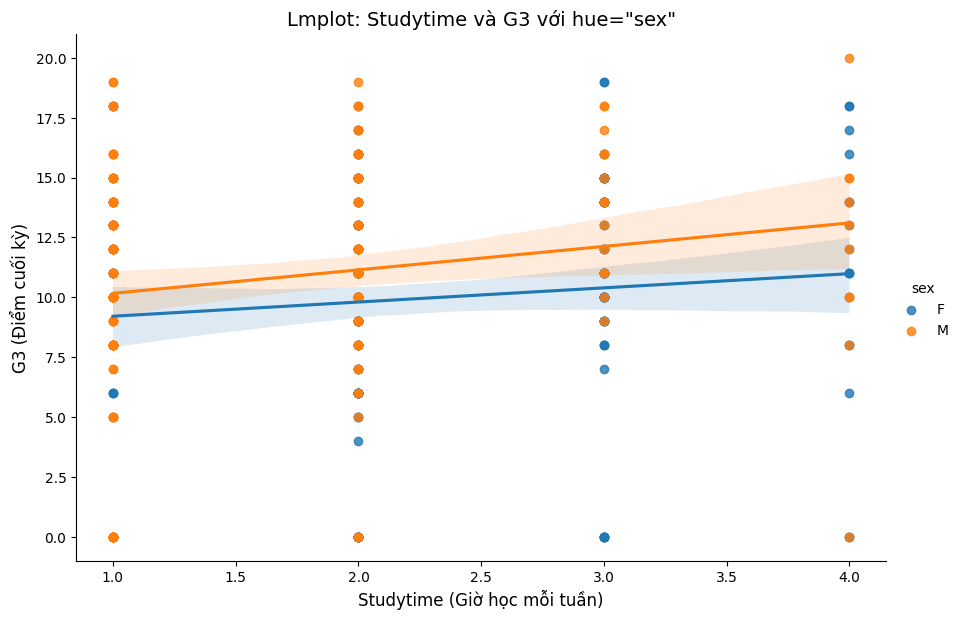

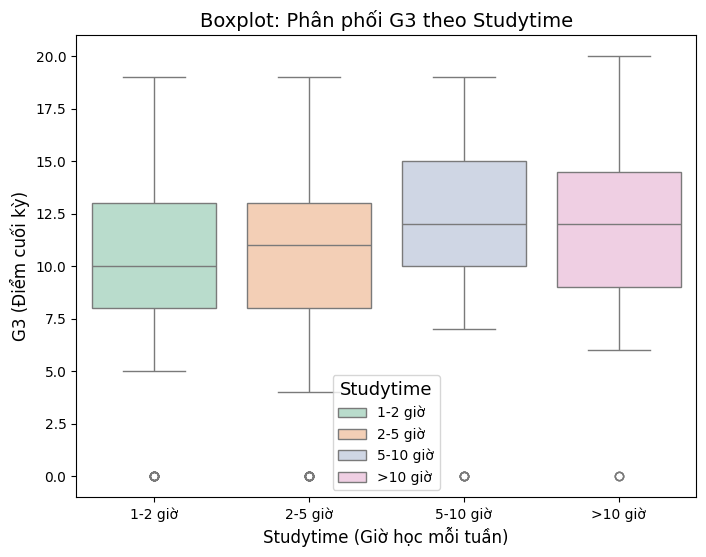

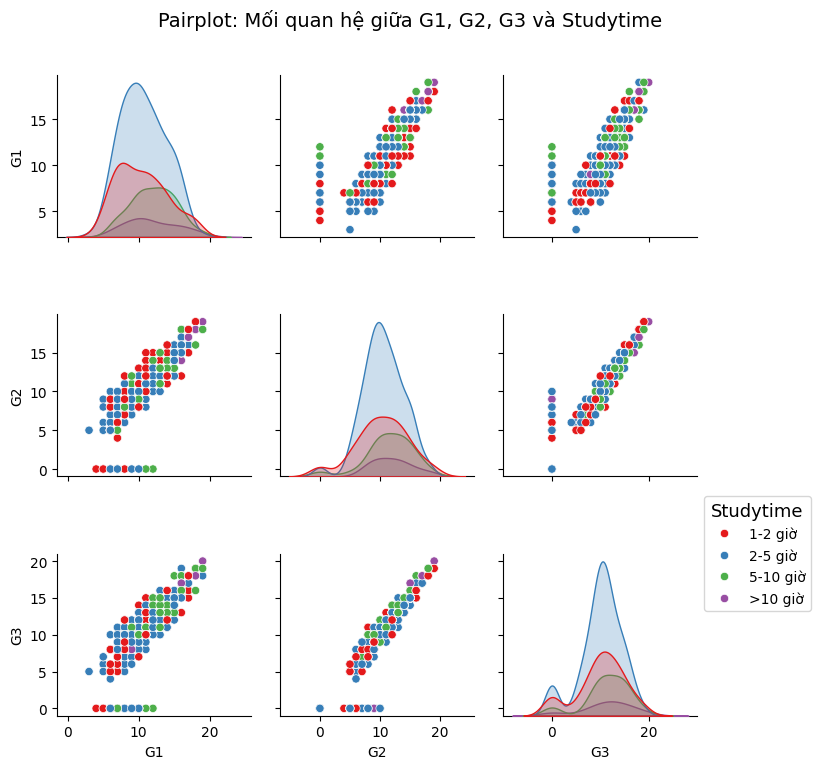

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ các dòng có giá trị NaN trong các cột cần vẽ
filtered_data = Student_Pandas[['G1', 'G2', 'G3', 'studytime']].dropna()

# Vẽ lmplot: studytime và G3 với hue='sex'
sns.lmplot(x='studytime', y='G3', data=Student_Pandas, hue='sex', aspect=1.5, height=6)
plt.title('Lmplot: Studytime và G3 với hue="sex"', fontsize=14)
plt.xlabel('Studytime (Giờ học mỗi tuần)', fontsize=12)
plt.ylabel('G3 (Điểm cuối kỳ)', fontsize=12)
plt.show()

# Định nghĩa legend_labels cho các giá trị của studytime
legend_labels = {1: '1-2 giờ', 2: '2-5 giờ', 3: '5-10 giờ', 4: '>10 giờ'}
# Vẽ boxplot: Phân phối G3 theo studytime với màu sắc tùy chỉnh
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=Student_Pandas, hue='studytime', palette='Pastel2')
plt.title('Boxplot: Phân phối G3 theo Studytime', fontsize=14)
# Cập nhật nhãn cho các giá trị của studytime
plt.xticks(ticks=[0, 1, 2, 3], labels=[legend_labels[i] for i in range(1, 5)], rotation=0)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title='Studytime', title_fontsize='13', loc='lower center', fontsize='10')
plt.xlabel('Studytime (Giờ học mỗi tuần)', fontsize=12)
plt.ylabel('G3 (Điểm cuối kỳ)', fontsize=12)
plt.show()

# Vẽ pairplot: Mối quan hệ giữa G1, G2, G3, studytime
g = sns.pairplot(filtered_data, hue='studytime', palette='Set1')
plt.suptitle('Pairplot: Mối quan hệ giữa G1, G2, G3 và Studytime', fontsize=14, y=1.02)
handles, labels = g._legend_data.values(), g._legend_data.keys()
new_labels = [legend_labels[int(label)] for label in labels]
g._legend.remove()
plt.legend(handles, new_labels, title='Studytime', title_fontsize='13', 
           loc='center left', bbox_to_anchor=(1, 1), fontsize='10')
plt.tight_layout()  # Giúp tránh bị trùng lặp layout khi đặt legend ngoài
plt.show()

## Dựa vào biểu đồ lmplot giữa studytime (thời gian học mỗi tuần) và G3 (điểm cuối kỳ) với phân biệt theo giới tính (hue = "sex"), em có thể đưa ra một số nhận xét như sau:
1. Mối quan hệ giữa thời gian học và điểm cuối kỳ (G3):
- Biểu đồ cho thấy xu hướng chung là khi thời gian học tăng lên, điểm cuối kỳ cũng có xu hướng tăng nhẹ. Điều này hợp lý vì việc học tập nhiều hơn thường giúp học sinh nắm vững kiến thức hơn, từ đó cải thiện kết quả thi.
- Tuy nhiên, độ dốc của đường hồi quy không quá lớn, nghĩa là mặc dù học nhiều hơn có xu hướng điểm cao hơn nhưng sự cải thiện điểm số không phải là rất lớn hoặc ngay lập tức.
- Ngoài ra, sự phân tán các điểm dữ liệu xung quanh đường hồi quy cũng cho thấy rằng không phải lúc nào học nhiều cũng dẫn đến điểm số cao; còn có các yếu tố khác ảnh hưởng đến kết quả như chất lượng học, phương pháp học, và khả năng tiếp thu của học sinh.
2. So sánh giữa học sinh nam và nữ:
- Học sinh nam (M) có xu hướng có điểm trung bình cao hơn so với học sinh nữ (F) ở các mức thời gian học tương tự, được thể hiện qua đường hồi quy của nhóm nam cao hơn đường hồi quy của nhóm nữ.
- Điều này có thể phản ánh sự khác biệt về cách học, cách tiếp cận kiến thức hoặc sự chăm chỉ giữa hai giới, hoặc cũng có thể do đặc điểm cá nhân, môi trường học tập, hay những yếu tố xã hội tác động khác.
- Tuy nhiên, sự chồng lấn của các điểm dữ liệu cho thấy vẫn có nhiều học sinh nữ đạt điểm cao hoặc thấp tương đương với học sinh nam, tức là sự khác biệt không phải lúc nào cũng tuyệt đối.
3. Về nhóm học sinh có thời gian học ít (studytime = 1):
##### Những học sinh dành ít thời gian học mỗi tuần thường có điểm cuối kỳ khá thấp, hoặc có nhiều điểm gần bằng 0, cho thấy hiệu quả học tập thấp. Lý do hợp lý đại đại cho tình trạng học ít này có thể là:
+ Thiếu động lực hoặc chưa nhận thức được tầm quan trọng của việc học: Một số học sinh có thể chưa thấy cần thiết phải đầu tư nhiều thời gian vào học tập vì chưa có mục tiêu rõ ràng hoặc chưa gặp áp lực học tập đủ lớn.
+ Hoạt động ngoại khóa hoặc công việc khác chiếm nhiều thời gian: Có thể các em tham gia nhiều hoạt động thể thao, nghệ thuật, hoặc thậm chí đi làm thêm, làm giảm thời gian dành cho việc học.
+ Phương pháp học chưa hiệu quả hoặc môi trường học không thuận lợi: Một số học sinh có thể gặp khó khăn trong việc tập trung, không biết cách học hiệu quả, hoặc sống trong môi trường không có sự hỗ trợ đầy đủ.
+ Vấn đề cá nhân hoặc sức khỏe: Những yếu tố như gia đình, sức khỏe không tốt cũng có thể khiến học sinh không thể dành nhiều thời gian học.
##### Tình trạng này nếu kéo dài có thể ảnh hưởng tiêu cực đến thành tích học tập và cơ hội phát triển trong tương lai của các em, nên cần được quan tâm, hỗ trợ từ gia đình, nhà trường và xã hội.
4. Kết luận chung:
- Biểu đồ lmplot giúp ta hình dung được mối quan hệ tích cực nhưng không quá mạnh giữa thời gian học và điểm số, đồng thời chỉ ra sự khác biệt nhất định về kết quả học tập giữa nam và nữ.
- Mặc dù học nhiều hơn có xu hướng giúp điểm số cao hơn, việc tối ưu hóa kết quả học tập còn cần đến các yếu tố khác như phương pháp học, sự hỗ trợ, cũng như động lực cá nhân.
- Đặc biệt, nhóm học sinh học ít cần được quan tâm để cải thiện thói quen học tập và tạo điều kiện thuận lợi hơn cho quá trình học tập của các em.


## Dựa vào biểu đồ boxplot thể hiện phân phối điểm cuối kỳ (G3) theo từng mức thời gian học mỗi tuần (studytime), em có thể rút ra một số nhận xét chi tiết như sau:
1. Phân phối điểm G3 theo từng nhóm studytime:
### Median (Trung vị):
- Điểm trung vị của các nhóm studytime tăng dần từ nhóm 1 (khoảng 10 điểm) đến nhóm 3 và 4 (khoảng 12 điểm). Điều này cho thấy rõ xu hướng chung: học sinh dành nhiều thời gian học hơn thì điểm trung vị cao hơn.
- Trung vị điểm của nhóm studytime 2 cũng cao hơn nhóm 1 một chút, cho thấy việc tăng thời gian học có ảnh hưởng tích cực đến kết quả học tập.
### Khoảng tứ phân vị (IQR):
- Khoảng cách giữa 25% và 75% (hộp màu) của các nhóm studytime khá tương đồng, dao động từ khoảng 7-8 điểm đến khoảng 15 điểm.
- Nhóm studytime 3 có khoảng tứ phân vị cao nhất, cho thấy nhóm này có sự đa dạng lớn hơn về điểm số, có học sinh đạt điểm rất cao và cũng có những người thấp hơn.
### Phạm vi (Whiskers):
Các nhóm đều có phạm vi điểm khá rộng, dao động từ khoảng 5 điểm đến gần 20 điểm, cho thấy sự đa dạng về kết quả học tập trong từng nhóm thời gian học.
Phạm vi rộng này phản ánh rằng dù học sinh có cùng thời gian học nhưng điểm số có thể rất khác nhau, có thể do các yếu tố như phương pháp học, khả năng tiếp thu, động lực cá nhân.
### Outliers (Giá trị ngoại lai):
Mỗi nhóm đều có một số giá trị ngoại lai thấp, tức là một vài học sinh đạt điểm rất thấp (gần hoặc bằng 0). Đây có thể là những học sinh gặp khó khăn nghiêm trọng trong học tập hoặc có các vấn đề khác như sức khỏe, hoàn cảnh gia đình, hay không tham gia học đầy đủ.
2. Ý nghĩa tổng thể:
- Biểu đồ boxplot cho thấy rõ sự cải thiện điểm số trung bình và trung vị khi thời gian học tăng lên, củng cố thêm quan điểm rằng thời gian học là một yếu tố quan trọng ảnh hưởng đến kết quả học tập.
- Tuy nhiên, sự phân tán và xuất hiện các giá trị ngoại lai cũng nhấn mạnh rằng việc học nhiều không đảm bảo tất cả học sinh đều có kết quả tốt, vẫn có nhiều yếu tố bên ngoài và cá nhân khác tác động đến điểm số.
- Các giá trị ngoại lai thấp có thể là dấu hiệu cảnh báo về những học sinh cần được quan tâm, hỗ trợ thêm để cải thiện hiệu quả học tập.
3. Kết luận:
- Nhìn chung, biểu đồ boxplot thể hiện một cách trực quan sự phân bố và biến thiên điểm số theo các nhóm thời gian học khác nhau, từ đó giúp hiểu rõ hơn mối quan hệ giữa thời gian học và thành tích học tập.
- Việc tăng thời gian học có xu hướng đem lại kết quả tốt hơn, nhưng cũng cần lưu ý đến sự đa dạng trong kết quả do các yếu tố cá nhân và môi trường học tập khác nhau.
- Đây là cơ sở để các nhà giáo dục, phụ huynh và học sinh có thể cân nhắc xây dựng kế hoạch học tập hợp lý, đồng thời chú ý đến các học sinh có kết quả học tập yếu để có biện pháp hỗ trợ kịp thời.

## Dựa vào biểu đồ pairplot thể hiện mối quan hệ giữa các biến điểm số các kỳ học (G1, G2, G3) và thời gian học mỗi tuần (studytime), em có thể rút ra các nhận xét chi tiết như sau:
1. Mối quan hệ giữa các điểm số G1, G2 và G3:
- Biểu đồ phân tán ở các cặp biến (G1 vs G2, G1 vs G3, G2 vs G3) cho thấy có mối tương quan rất mạnh và dương giữa các điểm số kỳ đầu (G1), giữa kỳ (G2) và cuối kỳ (G3).
- Điều này có nghĩa là học sinh có điểm cao ở kỳ đầu và giữa kỳ thường sẽ có điểm cao ở cuối kỳ, phản ánh sự nhất quán trong quá trình học tập của các em.
- Các điểm dữ liệu tập trung thành các cụm dọc theo đường chéo từ dưới trái lên trên phải, cho thấy sự đồng thuận trong sự phát triển điểm số qua các kỳ.
2. Phân phối các điểm số theo từng nhóm studytime:
- Các đường mật độ (density plots) ở hàng chéo (trục chính) thể hiện phân phối của G1, G2 và G3 tương ứng với từng nhóm studytime được đánh dấu bằng màu sắc khác nhau (đỏ, xanh dương, xanh lá, tím).
- Nhóm học sinh có thời gian học thấp (studytime = 1, màu đỏ) có xu hướng phân phối điểm số dồn về phía bên trái, tức là điểm thấp hơn so với các nhóm khác.
- Ngược lại, các nhóm studytime cao hơn (3 và 4) có phân phối điểm dịch chuyển sang bên phải, tức là có điểm số cao hơn, đặc biệt rõ ở G3. Đây là minh chứng trực quan cho mối liên hệ tích cực giữa thời gian học và kết quả học tập.
3. Mối quan hệ giữa studytime và các điểm số:
Mặc dù điểm số G1, G2 và G3 đều có mối tương quan chặt chẽ với nhau, nhưng sự phân tách màu sắc theo studytime cho thấy học sinh học nhiều hơn có xu hướng đạt điểm cao hơn, nhất là ở kỳ cuối (G3). Điều này cho thấy thời gian học ảnh hưởng tích cực đến sự tiến bộ và kết quả cuối cùng của học sinh.
4. Tính đa chiều của dữ liệu:
- Biểu đồ pairplot cho phép quan sát đồng thời mối quan hệ song song giữa nhiều biến, giúp nhận ra rằng các biến điểm số kỳ học có tính chất tuyến tính khá mạnh và đồng nhất với nhau.
- Đây là cơ sở để có thể xây dựng các mô hình dự báo điểm cuối kỳ G3 dựa trên điểm số các kỳ trước và thời gian học, hoặc các phân tích nâng cao khác.

## Bokeh:

In [460]:
from bokeh.plotting import figure, show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, HoverTool, Slider
from bokeh.io import output_notebook
from bokeh.models.callbacks import CustomJS
import pandas as pd

# Prepare data for the plots
studytime_data = Student_Pandas['studytime'].value_counts().sort_index()  # Count of each studytime value

# Add color to the data
colors = ['red', 'blue', 'green', 'orange']
studytime_data_colored = studytime_data.reset_index()
studytime_data_colored.columns = ['studytime', 'count']  # Rename columns for clarity
studytime_data_colored['color'] = colors[:len(studytime_data_colored)]

# Create a ColumnDataSource with color column
bar_source = ColumnDataSource(studytime_data_colored)

# Bar chart for studytime distribution
bar_plot = figure(x_axis_label='Study Time', y_axis_label='Count', title="Bar chart: Studytime Distribution")
bar_plot.vbar(x='studytime', top='count', source=bar_source, width=0.9, color='color')

# Đọc dữ liệu
df = pd.read_csv("D:/năm 3/HK2/phân tích dữ liệu/student-mat.csv", sep=';')

# Chia dữ liệu theo giới tính
df_male = df[df['sex'] == 'M']
df_female = df[df['sex'] == 'F']
source_male = ColumnDataSource(df_male)
source_female = ColumnDataSource(df_female)

# Biểu đồ phân tán
scatter = figure(title="Studytime và G3 theo giới tính", tools="pan,wheel_zoom,box_zoom,reset")
r1 = scatter.scatter(x='studytime', y='G3', source=source_male, size=10, color='blue', legend_label='Nam')
r2 = scatter.scatter(x='studytime', y='G3', source=source_female, size=10, color='red', legend_label='Nữ')

# Thêm HoverTool
hover = HoverTool(tooltips=[("Age", "@age"), ("Sex", "@sex"), ("Absences", "@absences")])
scatter.add_tools(hover)

# Đặt nhãn cho các trục
scatter.xaxis.axis_label = "Studytime (1-4)"
scatter.yaxis.axis_label = "G3 Score"

# Đặt vị trí và click_policy cho legend
scatter.legend.location = "bottom_center"  # Vị trí của legend
scatter.legend.click_policy = "hide"  # Cho phép ẩn/hiện các điểm theo nhóm trong legend

# Thêm Slider để lọc studytime
slider = Slider(start=1, end=4, step=1, value=1, title="Lọc Studytime")
slider.js_on_change('value', CustomJS(args=dict(source_male=source_male, source_female=source_female, r1=r1, r2=r2), code="""
    const studytime_val = cb_obj.value; // Lấy giá trị từ slider
    const male_data = source_male.data;
    const female_data = source_female.data;
    
    // Hàm lọc dữ liệu
    function filter_data(source) {
        const filtered = {studytime: [], G3: [], age: [], sex: [], absences: []};
        for (let i = 0; i < source['studytime'].length; i++) {
            if (source['studytime'][i] >= studytime_val) { // Lọc studytime theo giá trị slider
                filtered.studytime.push(source['studytime'][i]);
                filtered.G3.push(source['G3'][i]);
                filtered.age.push(source['age'][i]);
                filtered.sex.push(source['sex'][i]);
                filtered.absences.push(source['absences'][i]);
            }
        }
        return filtered;
    }
    
    // Áp dụng bộ lọc cho dữ liệu Nam và Nữ
    r1.data_source.data = filter_data(male_data);
    r2.data_source.data = filter_data(female_data);
"""))

# Combine the bar chart and scatter plot in a row layout
layout = column(bar_plot, scatter, slider)

# Display the layout
output_notebook()
show(layout)

Loading BokehJS ...

## Dựa vào biểu đồ bar chart và scatter plot về phân phối thời gian học (studytime) này, em có thể rút ra những nhận xét chi tiết và hợp lý như sau:
1. Phân bố số lượng học sinh theo mức thời gian học:
- Mức thời gian học phổ biến nhất là 2 giờ mỗi tuần (studytime = 2), với số lượng học sinh khoảng gần 200 em. Điều này cho thấy phần lớn học sinh trong dữ liệu lựa chọn dành khoảng 2 giờ mỗi tuần để học thêm ngoài giờ học chính khóa.
- Mức học ít nhất là 1 giờ mỗi tuần (studytime = 1), với số lượng học sinh khoảng hơn 100 em, chiếm tỷ lệ khá lớn trong tổng số.
- Thời gian học 3 giờ mỗi tuần có số lượng học sinh thấp hơn nhiều, khoảng 70 em, và số học sinh dành 4 giờ mỗi tuần học tập là ít nhất, chỉ khoảng 25 em.
2. Nhận xét về xu hướng học tập:
-Có thể thấy, đa số học sinh học theo mức trung bình và thấp (1 đến 2 giờ mỗi tuần), còn nhóm học sinh học nhiều (3-4 giờ) chiếm tỷ lệ rất nhỏ. Điều này phản ánh một xu hướng chung trong học sinh, khi nhiều em chỉ dành một khoảng thời gian vừa phải để học thêm, có thể vì áp lực học tập chính khóa đã chiếm phần lớn thời gian, hoặc do các yếu tố bên ngoài như hoạt động ngoại khóa, nghỉ ngơi, giải trí.
- Số lượng học sinh học ít (1 giờ) vẫn khá lớn, điều này là một điểm cần lưu ý trong phân tích và giáo dục, vì thời gian học quá ít có thể ảnh hưởng không tốt đến kết quả học tập.
3. Lý do đại đại và hợp lý cho việc học ít:
- Thiếu nhận thức về tầm quan trọng của việc học thêm: Một số học sinh có thể chưa thực sự hiểu rằng việc dành thêm thời gian học có thể cải thiện kết quả học tập, dẫn đến việc không tập trung hoặc không ưu tiên học thêm.
- Áp lực từ nhiều phía: Học sinh có thể gặp áp lực từ các hoạt động khác như thể thao, nghệ thuật, hoặc các công việc gia đình, làm thêm, khiến thời gian dành cho học tập bị hạn chế.
- Phương pháp học không hiệu quả: Có thể một số em không biết cách tổ chức thời gian học sao cho hiệu quả, hoặc cảm thấy học tập quá căng thẳng và không có động lực.
- Sức khỏe hoặc hoàn cảnh cá nhân: Các vấn đề về sức khỏe, hoặc hoàn cảnh gia đình khó khăn cũng có thể là nguyên nhân khiến học sinh không thể dành nhiều thời gian học.
- Học sinh có thể đang học bù hoặc học theo nhóm ngoài giờ: Một số em dù có thời gian học ít trong tuần nhưng lại có thể học thêm các buổi khác không được ghi nhận, hoặc nhận hỗ trợ từ gia sư hoặc bạn bè.
4. Kết luận:
Biểu đồ bar chart này phản ánh rõ xu hướng phân bố thời gian học của học sinh trong dữ liệu, với đa số học sinh chọn học ở mức trung bình hoặc thấp. Việc có một lượng học sinh khá lớn học ít là dấu hiệu cần được chú ý để nhà trường và gia đình có thể có các biện pháp hỗ trợ, nâng cao nhận thức và tạo động lực học tập cho các em. Đồng thời cũng nên khuyến khích các học sinh học nhiều hơn trong mức hợp lý để tăng hiệu quả học tập.

# Công việc 3: Kiểm định thống kê với giả thuyết

## 1. T-test

In [461]:
import pandas as pd
from scipy import stats

# Giả sử Student_Pandas là DataFrame của bạn
mean_absences = Student_Pandas['absences'].mean()

# Tạo hai nhóm dựa trên trung bình absences
group1 = Student_Pandas[Student_Pandas['absences'] > mean_absences]  # absences > trung bình
group2 = Student_Pandas[Student_Pandas['absences'] <= mean_absences]  # absences <= trung bình

# Thực hiện t-test giữa hai nhóm
t_stat, p_value = stats.ttest_ind(group1['G3'], group2['G3'])

# Báo cáo kết quả
alpha = 0.05
if p_value < alpha:
    conclusion = "Bác bỏ giả thuyết H₀: Có sự khác biệt đáng kể giữa điểm G3 của hai nhóm."
else:
    conclusion = "Không bác bỏ giả thuyết H₀: Không có sự khác biệt đáng kể giữa điểm G3 của hai nhóm."

print(f"T-statistic: {t_stat}, p-value: {p_value}")
print(f"Kết luận: {conclusion}")

T-statistic: 1.3982633522725831, p-value: 0.16282255783546729
Kết luận: Không bác bỏ giả thuyết H₀: Không có sự khác biệt đáng kể giữa điểm G3 của hai nhóm.


## Từ kết quả trên, ta có thể thấy được T-statistic ~ 1.40 và p-value ~ 0.163, với mức ý nghĩa 𝛼 = 0.05. 
- Điều này có nghĩa là không có sự khác biệt đáng kể giữa điểm G3 của học sinh có số ngày nghỉ cao (absences > trung bình) và học sinh có số ngày nghỉ thấp (absences ≤ trung bình). 
- Kết quả này cho thấy rằng số ngày nghỉ không phải là yếu tố duy nhất quyết định điểm số của học sinh. Có thể các yếu tố khác như phương pháp học, sự tập trung, động lực cá nhân, hay môi trường học tập đóng vai trò quan trọng hơn trong việc ảnh hưởng đến điểm G3 của học sinh.
- Kết quả không bác bỏ giả thuyết null không có nghĩa là số ngày nghỉ hoàn toàn không ảnh hưởng đến điểm G3, mà chỉ là không có đủ bằng chứng thống kê để khẳng định rằng có sự khác biệt giữa hai nhóm trong dữ liệu hiện tại.

## 2. Z-test

In [462]:
# Tính toán Z-test cho bài toán của bạn

# Lọc nhóm học sinh có studytime <= 2
group_studytime_low = df[df['studytime'] <= 2]

# Tính trung bình điểm G3 của toàn bộ học sinh
mean_all = df['G3'].mean()

# Tính trung bình điểm G3 của nhóm học sinh có studytime <= 2
mean_studytime_low = group_studytime_low['G3'].mean()

# Tính độ lệch chuẩn của nhóm học sinh studytime <= 2
std_studytime_low = group_studytime_low['G3'].std()

# Số lượng học sinh trong nhóm studytime <= 2
n_studytime_low = group_studytime_low.shape[0]

# Tính Z-value
z_value = (mean_studytime_low - mean_all) / (std_studytime_low / (n_studytime_low ** 0.5))

# Tính p-value từ Z-value
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(z_value)))  # two-tailed test

# So sánh trung bình G3 của nhóm học sinh studytime <= 2 với trung bình toàn bộ học sinh
if mean_studytime_low < mean_all:
    comparison = "Nhóm học sinh studytime <= 2 có trung bình G3 thấp hơn so với toàn bộ học sinh."
elif mean_studytime_low > mean_all:
    comparison = "Nhóm học sinh studytime <= 2 có trung bình G3 cao hơn so với toàn bộ học sinh."
else:
    comparison = "Trung bình G3 của nhóm học sinh studytime <= 2 bằng với trung bình toàn bộ học sinh."
    
# Kết luận
alpha = 0.05
conclusion = "Bác bỏ giả thuyết H₀: Trung bình điểm G3 của nhóm học sinh học ít khác biệt đáng kể so với trung bình kỳ vọng." if p_value < alpha else "Không bác bỏ giả thuyết H₀: Trung bình điểm G3 của nhóm học sinh học ít không khác biệt đáng kể so với trung bình kỳ vọng."

print(f"Trung bình G3 (studytime <= 2): {mean_studytime_low}, Trung bình G3 (all): {mean_all}")
print(f"So sánh với trung bình toàn bộ: ",comparison)
print(f"Z-value: {z_value}, p-value: {p_value}")
print(f"Kết luận: {conclusion}")

Trung bình G3 (studytime <= 2): 10.128712871287128, Trung bình G3 (all): 10.415189873417722
So sánh với trung bình toàn bộ:  Nhóm học sinh studytime <= 2 có trung bình G3 thấp hơn so với toàn bộ học sinh.
Z-value: -1.1132147357769346, p-value: 0.2656162153961641
Kết luận: Không bác bỏ giả thuyết H₀: Trung bình điểm G3 của nhóm học sinh học ít không khác biệt đáng kể so với trung bình kỳ vọng.


## Từ kết quả trên ta có thể thấy p-value ~ 0.266 lớn hơn mức ý nghĩa α=0.05, chúng ta không bác bỏ giả thuyết null (H₀). Điều này có nghĩa là không có sự khác biệt đáng kể giữa trung bình điểm G3 của nhóm học sinh có studytime ≤ 2 và trung bình điểm G3 của toàn bộ học sinh.
- So sánh với trung bình toàn bộ: Trung bình điểm G3 của nhóm học sinh có studytime ≤ 2 thấp hơn so với toàn bộ học sinh. Tuy nhiên, do p-value > 0.05, chúng ta không thể kết luận rằng sự khác biệt này là có ý nghĩa thống kê.
- Về lý thuyết: Mặc dù nhóm học sinh có studytime ≤ 2 có điểm trung bình thấp hơn một chút so với toàn bộ học sinh, nhưng kiểm định Z-test cho thấy không có đủ bằng chứng để kết luận rằng thời gian học ít có ảnh hưởng đáng kể đến điểm G3.
- Về thực tiễn: Kết quả này gợi ý rằng sự khác biệt trong thời gian học không đủ lớn để tạo ra sự thay đổi đáng kể trong kết quả học tập (điểm G3). Tuy nhiên, cần lưu ý rằng các yếu tố khác ngoài thời gian học, chẳng hạn như phương pháp học, sự chú tâm, và các yếu tố cá nhân, có thể ảnh hưởng nhiều hơn đến điểm số của học sinh.

## 3. Chi-square test

In [463]:
import pandas as pd
from scipy import stats

# Tạo biến nhị phân từ G3
Student_Pandas['G3_high'] = (Student_Pandas['G3'] >= 12).astype(int)  # Biến nhị phân (1 nếu G3 >= 12, 0 nếu G3 < 12)

# Xây dựng bảng tần số (contingency table) giữa studytime và biến nhị phân G3
contingency_table = pd.crosstab(Student_Pandas['studytime'],Student_Pandas['G3_high'])

# Thực hiện kiểm định Chi-square
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Báo cáo kết quả
alpha = 0.05  # Mức ý nghĩa
if p_value_chi2 < alpha:
    conclusion_chi2 = "Bác bỏ giả thuyết H₀: Có mối quan hệ giữa mức thời gian học và việc đạt điểm cao hay thấp."
else:
    conclusion_chi2 = "Không bác bỏ giả thuyết H₀: Không có mối quan hệ giữa mức thời gian học và việc đạt điểm cao hay thấp."

# In kết quả
print(f"Bảng tần số (Contingency Table):\n{contingency_table}")
print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_value_chi2}")
print(f"Kết luận: {conclusion_chi2}")

Bảng tần số (Contingency Table):
G3_high      0   1
studytime         
1           61  44
2          127  71
3           32  33
4           13  14
Chi-square Statistic: 6.077519239112519, p-value: 0.10789905479478563
Kết luận: Không bác bỏ giả thuyết H₀: Không có mối quan hệ giữa mức thời gian học và việc đạt điểm cao hay thấp.


## Từ kết quả trên, chúng ta có thể thấy được: Chi-square statistic ~ 6.078 và p-value ~ 0.108. Vì p-value = 0.183 lớn hơn 0.05, không bác bỏ giả thuyết H₀. Điều này có nghĩa là không có mối quan hệ đáng kể giữa mức thời gian học (studytime) và việc đạt điểm cao (G3 ≥ 12) hay thấp (G3 < 12) trong mẫu dữ liệu này.
- Về lý thuyết: Mặc dù nhiều người nghĩ rằng học sinh có thời gian học nhiều sẽ đạt điểm cao hơn, kết quả kiểm định Chi-square cho thấy không có mối quan hệ rõ ràng giữa mức thời gian học và việc đạt điểm cao hoặc thấp. Điều này có thể chỉ ra rằng các yếu tố khác, chẳng hạn như phương pháp học, sự tập trung, và các yếu tố cá nhân, cũng có ảnh hưởng lớn đến điểm số ngoài thời gian học.
- Về thực tiễn: Kết quả này gợi ý rằng chỉ có thời gian học không đủ để đảm bảo điểm số cao. Các yếu tố khác như cách học, môi trường học, và khả năng tự học của học sinh có thể quan trọng hơn trong việc đạt điểm cao. Vì vậy, nếu muốn cải thiện điểm số, học sinh cần xem xét cách thức học hiệu quả hơn thay vì chỉ tăng thời gian học.

In [464]:
import numpy as np
import pandas as pd

# Redefine Student_Pandas if not already defined
if 'Student_Pandas' not in locals():
	file_path = 'D:/năm 3/HK2/phân tích dữ liệu/student-mat.csv'
	Student_Pandas = pd.read_csv(file_path, sep=';')

# Phát hiện ngoại lai trong cột G3 sử dụng IQR
Q1 = Student_Pandas['G3'].quantile(0.25)
Q3 = Student_Pandas['G3'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_G3 = Student_Pandas[(Student_Pandas['G3'] < lower_bound) | (Student_Pandas['G3'] > upper_bound)]

# Phát hiện ngoại lai trong cột absences sử dụng IQR
Q1_absences = Student_Pandas['absences'].quantile(0.25)
Q3_absences = Student_Pandas['absences'].quantile(0.75)
IQR_absences = Q3_absences - Q1_absences
lower_bound_absences = Q1_absences - 1.5 * IQR_absences
upper_bound_absences = Q3_absences + 1.5 * IQR_absences

outliers_absences = Student_Pandas[(Student_Pandas['absences'] < lower_bound_absences) | (Student_Pandas['absences'] > upper_bound_absences)]

# In kết quả ngoại lai
print(f'Ngoại lai trong G3:\n{outliers_G3}')
print(f'Ngoại lai trong Absences:\n{outliers_absences}')

Ngoại lai trong G3:
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, G3_high]
Index: []

[0 rows x 34 columns]
Ngoại lai trong Absences:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
40      GP   F   16       U     LE3       T     2     2     other     other   
74      GP   F   16       U     GT3       T     3     3     other  services   
103     GP   F   15       U     GT3       T     3     2  services     other   
183     GP   F   17       U     LE3       T     3     3     other     other   
198     GP   F   17       U     GT3       T     4     4  services   teacher   
205     GP   F   17       U     GT3       T     3     4   at_home  services   
216     GP   F   17       U     GT3       T     4     3     other     ot

## Ngoại lai trong G3: Không có dữ liệu ngoại lai nào được phát hiện trong cột G3. Điều này có thể là do các điểm G3 nằm trong phạm vi bình thường và không có giá trị bất thường so với phần lớn dữ liệu trong cột này.
## Ngoại lai trong Absences: Dữ liệu ngoại lai trong cột absences được phát hiện ở 15 học sinh, với các giá trị số ngày nghỉ rất cao so với các học sinh còn lại. Một số học sinh có số ngày nghỉ lên đến 75 ngày, 56 ngày, hoặc 54 ngày, trong khi đa số học sinh có số ngày nghỉ thấp hơn nhiều (thường dưới 30 ngày). Điều này cho thấy rằng có một số học sinh vắng mặt khá nhiều, có thể do lý do sức khỏe hoặc các yếu tố khác ảnh hưởng đến việc tham gia lớp học.
## Nhận xét về dữ liệu ngoại lai:
- Trong G3: Việc không có điểm ngoại lai trong cột G3 cho thấy rằng điểm số của học sinh trong lớp có xu hướng phân bố hợp lý và không có điểm nào vượt quá phạm vi chấp nhận được, điều này cũng đồng nghĩa với việc không có học sinh nào có điểm cực kỳ cao hoặc thấp so với những học sinh còn lại.
- Trong Absences: Các giá trị ngoại lai trong absences có thể là một dấu hiệu cho thấy một số học sinh có vấn đề trong việc tham gia lớp học. Những học sinh này có thể gặp phải các vấn đề như sức khỏe yếu, điều kiện gia đình không ổn định, hoặc những lý do khác khiến họ vắng mặt nhiều. Những giá trị ngoại lai này có thể giúp chúng ta nhận diện các học sinh cần sự hỗ trợ đặc biệt trong việc tham gia lớp học.
## Đề xuất xử lý và cải thiện:
- Giảm số ngày nghỉ: Các học sinh có số ngày nghỉ cao có thể cần sự hỗ trợ trong việc duy trì sự tham gia vào lớp học. Có thể cung cấp các chương trình học bổ sung hoặc học bù cho các học sinh này để họ có thể theo kịp bài vở.
- Hỗ trợ học sinh có vấn đề về sức khỏe hoặc điều kiện gia đình: Nếu số ngày nghỉ cao là do lý do sức khỏe hoặc các vấn đề gia đình, nhà trường có thể cung cấp các biện pháp hỗ trợ như tư vấn học đường, hoặc tạo cơ hội học trực tuyến để học sinh có thể tiếp tục học tập mà không bị gián đoạn.